In [ ]:
FALAR DE DISTRIBUICOES

Features are computed from a digitized image of a fine needle aspirate (FNA) of a breast mass. They describe characteristics of the cell nuclei present in the image.

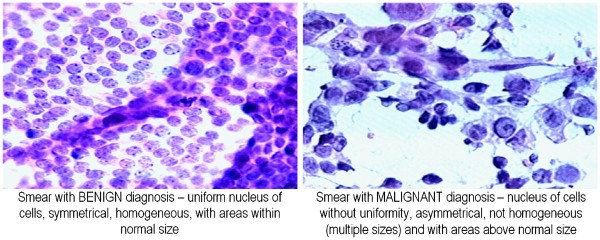

In [122]:
import pandas as pd

data = pd.read_csv('../Datasets/Wisconsin Diagnostic/breast-cancer-wisconsin.csv',low_memory=False)

In [123]:
data.sample(10)

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,Class
514,1306282,6,6,7,10,3,10.0,8,10,2,Benignant
482,1318169,9,10,10,10,10,5.0,10,10,10,Benignant
331,764974,5,1,1,1,2,1.0,3,1,2,Malignant
239,1243256,10,4,3,2,3,10.0,5,3,2,Benignant
378,657753,3,1,1,4,3,1.0,2,2,1,Malignant
249,169356,3,1,1,1,2,NaN,3,1,1,Malignant
40,1096800,6,6,6,9,6,NaN,7,8,1,Malignant
651,1323477,1,2,1,3,2,1.0,2,1,1,Malignant
676,1365328,1,1,2,1,2,1.0,2,1,1,Malignant
41,1099510,10,4,3,1,3,3.0,6,5,2,Benignant


In [126]:
data.describe()

,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,target
count,6.990000e+02,699.000000,699.000000,699.000000,699.000000,699.000000,683.000000,699.000000,699.000000,699.000000,699.000000
mean,1.071704e+06,4.417740,3.134478,3.207439,2.806867,3.216023,3.544656,3.437768,2.866953,1.589413,0.655222
std,6.170957e+05,2.815741,3.051459,2.971913,2.855379,2.214300,3.643857,2.438364,3.053634,1.715078,0.475636
min,6.163400e+04,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000
25%,8.706885e+05,2.000000,1.000000,1.000000,1.000000,2.000000,1.000000,2.000000,1.000000,1.000000,0.000000
50%,1.171710e+06,4.000000,1.000000,1.000000,1.000000,2.000000,1.000000,3.000000,1.000000,1.000000,1.000000
75%,1.238298e+06,6.000000,5.000000,5.000000,4.000000,4.000000,6.000000,5.000000,4.000000,1.000000,1.000000
max,1.345435e+07,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,1.000000


In [125]:
data['target']=data['Class'].apply(lambda x: 1 if x == "Malignant" else 0)
data.drop('Class',axis=1, inplace=True)

In [127]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.2, random_state=1991)
data_train['train']=1
data_test['train']=0
data = pd.concat([data_train,data_test])

data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 699 entries, 237 to 467
Data columns (total 12 columns):
Samplecodenumber            699 non-null int64
ClumpThickness              699 non-null int64
UniformityofCellSize        699 non-null int64
UniformityofCellShape       699 non-null int64
MarginalAdhesion            699 non-null int64
SingleEpithelialCellSize    699 non-null int64
BareNuclei                  683 non-null float64
BlandChromatin              699 non-null int64
NormalNucleoli              699 non-null int64
Mitoses                     699 non-null int64
target                      699 non-null int64
train                       699 non-null int64
dtypes: float64(1), int64(11)
memory usage: 71.0 KB


/Users/Francisco_de_Faria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Francisco_de_Faria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,Samplecodenumber,ClumpThickness,UniformityofCellSize,UniformityofCellShape,MarginalAdhesion,SingleEpithelialCellSize,BareNuclei,BlandChromatin,NormalNucleoli,Mitoses,target,train
545,1197527,5,1,1,1,2,1.0,2,1,1,1,1
567,1334071,4,1,1,1,2,3.0,2,1,1,1,1
678,1368273,1,1,1,1,2,1.0,1,1,1,1,0
634,1257366,3,1,1,1,2,1.0,1,1,1,1,0
643,1294413,1,1,1,1,2,1.0,1,1,1,1,0
539,1145420,6,1,1,1,2,1.0,2,1,1,1,1
299,63375,9,1,2,6,4,10.0,7,7,2,0,1
301,636130,1,1,1,1,2,1.0,3,1,1,1,1
310,684955,2,1,1,1,3,1.0,2,1,1,1,1
38,1084584,5,4,4,9,2,10.0,5,6,1,0,1


Samplecodenumber
ClumpThickness
UniformityofCellSize
UniformityofCellShape
MarginalAdhesion
SingleEpithelialCellSize
BareNuclei
BlandChromatin
NormalNucleoli
Mitoses


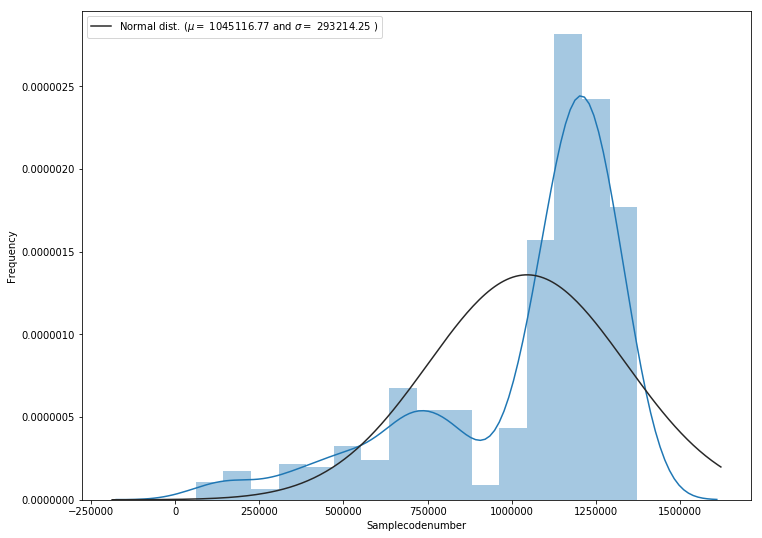

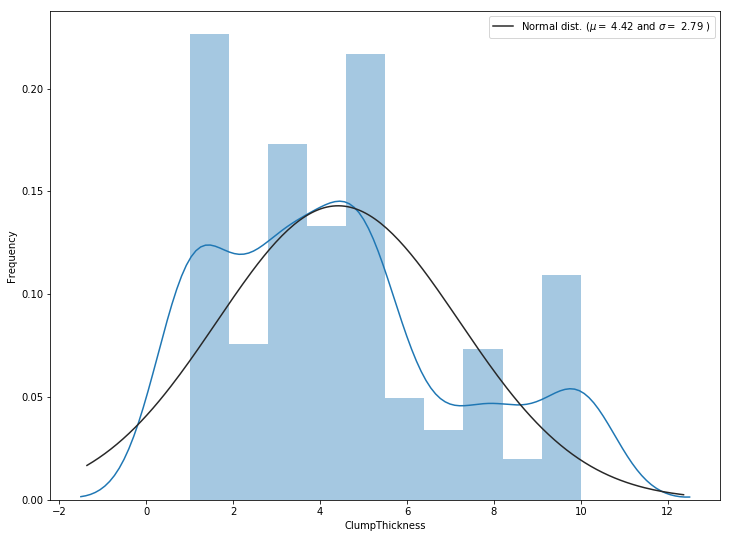

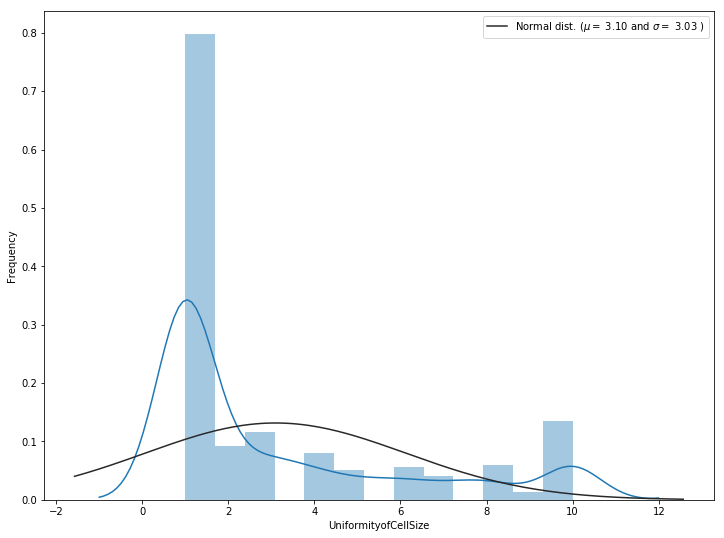

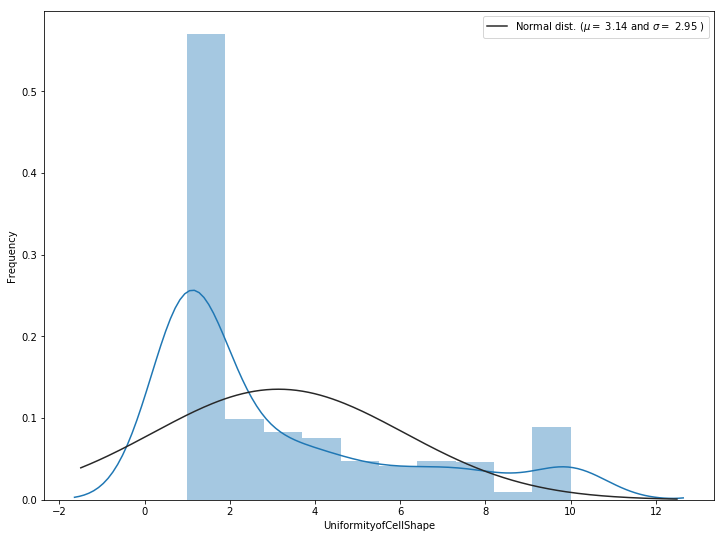

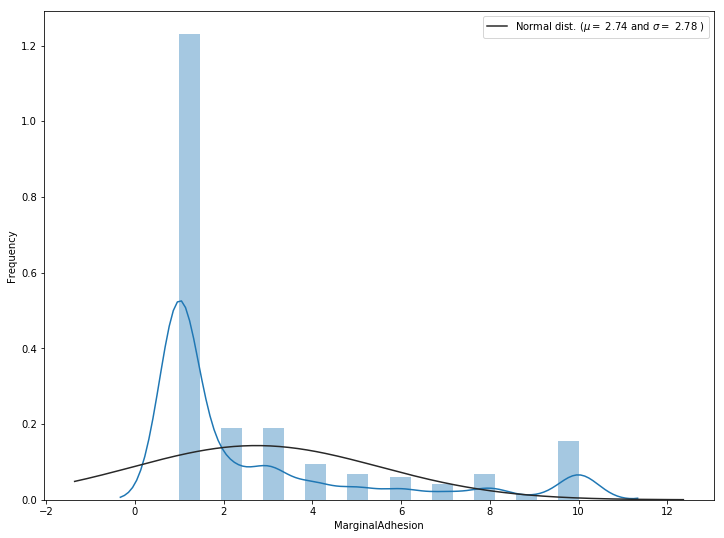

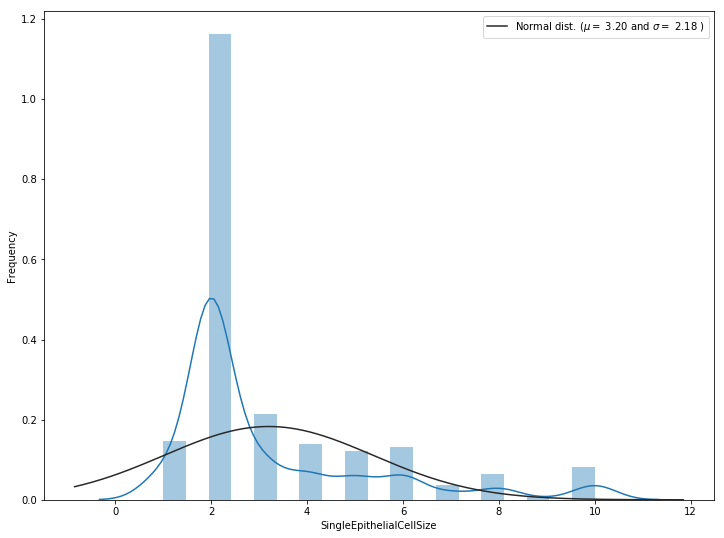

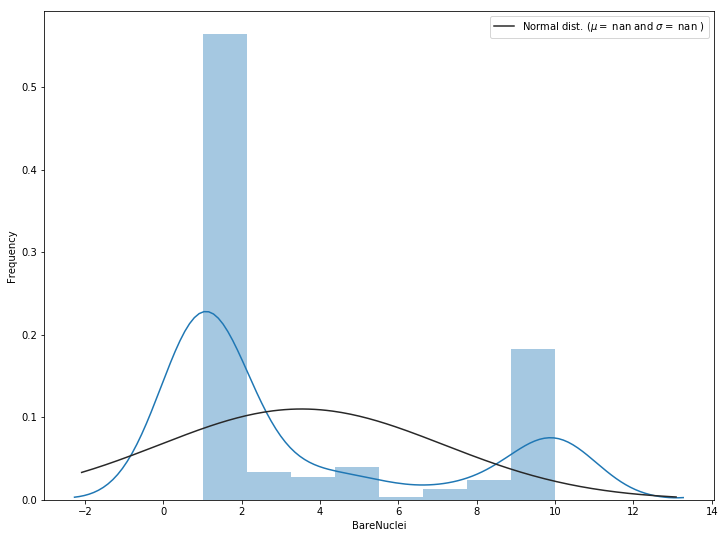

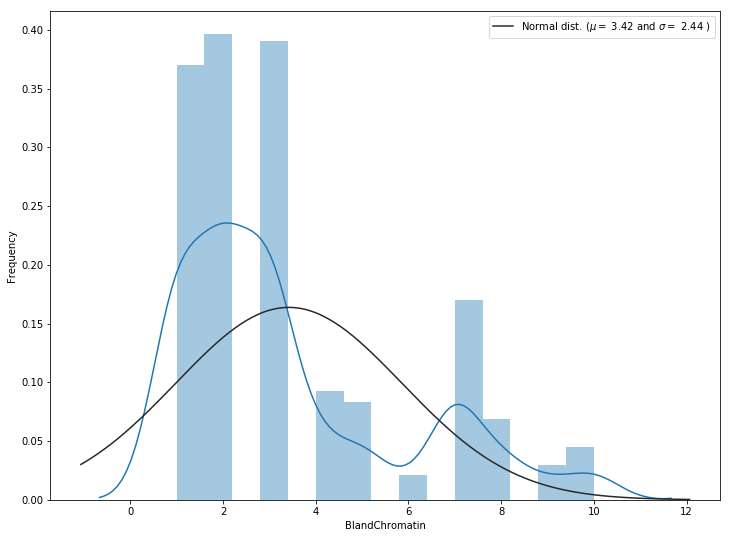

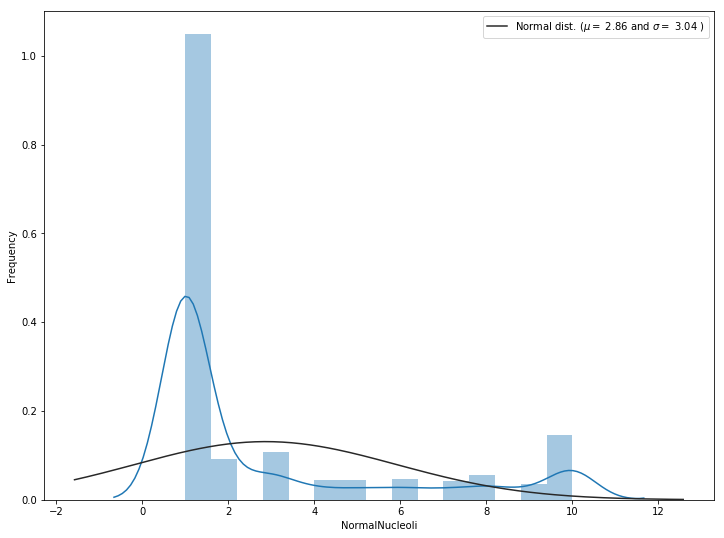

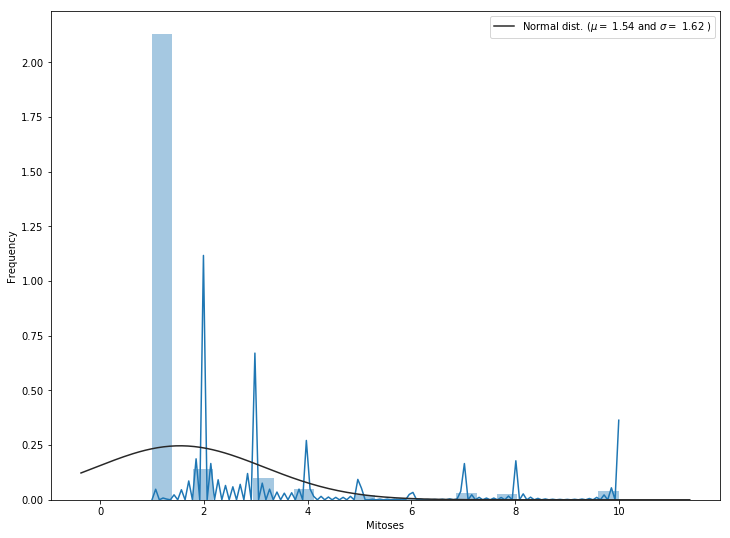

In [128]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

def get_distribution(input_data):
    plt.subplots(figsize=(12,9))
    sns.distplot(input_data.dropna(), fit=stats.norm)

    # Get the fitted parameters used by the function
    (mu, sigma) = stats.norm.fit(input_data)

    # plot with the distribution
    plt.legend(['Normal dist. ($\mu=$ {:.2f} and $\sigma=$ {:.2f} )'.format(mu, sigma)], loc='best')
    plt.ylabel('Frequency')
    
    return

for column in data.columns:
    if column not in ['train','target']:
        print(column)
        get_distribution(data[data['train']==1][column])

In [129]:
data = data.dropna()

X_train = data[data['train']==1].drop('target', axis=1)
y_train = data[data['train']==1]['target']
X_test = data[data['train']==0].drop('target', axis=1)
y_test = data[data['train']==0]['target']

In [130]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
y_test_scores = gnb.predict_proba(X_test)

In [131]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.80434782608695654

In [132]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_pred)

0.75559033989266544

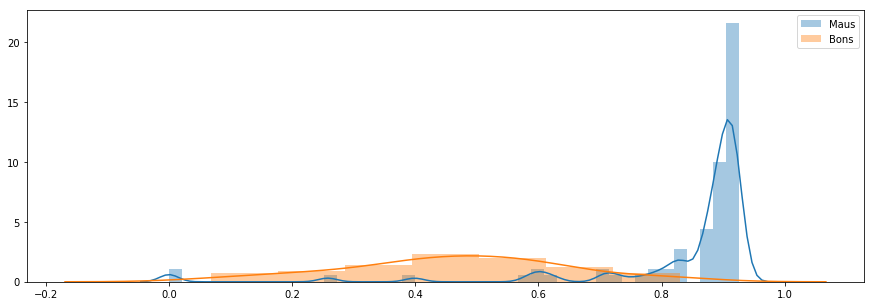

In [140]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Maus (target=1)
X_maus = data[(data['train']==0)&(data['target']==1)].drop('target', axis=1)
scores_maus = gnb.predict_proba(X_maus)

# Bons (target=0)
X_bons = data[(data['train']==0)&(data['target']==0)].drop('target', axis=1)
scores_bons = gnb.predict_proba(X_bons)

# Distribuição dos scores em cada sub-população
plt.subplots(figsize=(15,5))
sns.distplot(pd.Series(scores_maus[:,1]))
sns.distplot(pd.Series(scores_bons[:,1]))
plt.legend(['Maus','Bons'])

In [218]:
import pandas as pd

data = pd.read_csv('../Datasets/Adult/adult.csv',low_memory=False)
data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [219]:
from sklearn.model_selection import train_test_split

data_train, data_test = train_test_split(data, test_size=0.4, random_state=1991)
data_train['train']=1
data_test['train']=0
data = pd.concat([data_train,data_test])

data.info()
data.sample(10)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32561 entries, 8099 to 17344
Data columns (total 16 columns):
age               32561 non-null int64
workclass         32561 non-null object
fnlwgt            32561 non-null int64
education         32561 non-null object
education-num     32561 non-null int64
marital-status    32561 non-null object
occupation        32561 non-null object
relationship      32561 non-null object
race              32561 non-null object
sex               32561 non-null object
capital-gain      32561 non-null int64
capital-loss      32561 non-null int64
hours-per-week    32561 non-null int64
native-country    32561 non-null object
Income            32561 non-null object
train             32561 non-null int64
dtypes: int64(7), object(9)
memory usage: 4.2+ MB


/Users/Francisco_de_Faria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  after removing the cwd from sys.path.
/Users/Francisco_de_Faria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,Income,train
26569,27,Private,333296,Bachelors,13,Never-married,Other-service,Not-in-family,White,Male,0,0,30,?,<=50K,0
6660,43,Private,124692,Bachelors,13,Married-civ-spouse,Sales,Husband,White,Male,0,0,40,United-States,>50K,1
24237,19,Private,102723,Some-college,10,Never-married,Adm-clerical,Own-child,White,Female,0,0,40,United-States,<=50K,1
5851,36,Private,287658,HS-grad,9,Never-married,Adm-clerical,Own-child,Black,Male,0,0,40,United-States,<=50K,1
26256,29,Private,231287,Some-college,10,Divorced,Tech-support,Unmarried,White,Male,0,0,40,United-States,<=50K,1
22099,33,State-gov,243678,Some-college,10,Never-married,Tech-support,Not-in-family,White,Female,0,0,40,United-States,<=50K,0
15082,37,Local-gov,212005,Assoc-voc,11,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,40,United-States,>50K,0
11802,35,Private,22055,Some-college,10,Married-civ-spouse,Prof-specialty,Husband,Amer-Indian-Eskimo,Male,0,0,60,United-States,<=50K,1
29906,20,Private,391679,HS-grad,9,Never-married,Sales,Other-relative,White,Male,0,0,60,United-States,<=50K,0
31216,51,Self-emp-inc,338260,Prof-school,15,Married-civ-spouse,Prof-specialty,Husband,White,Male,15024,0,60,United-States,>50K,1


In [220]:
data.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'Income', 'train'],
      dtype='object')

### Categorical Naive Bayes

**Teorema de Bayes** 

$$ P(A|B) = \frac{P(B|A).P(A)}{P(B)}$$

Simplificando um pouco nosso problema, vamos supor o seguinte sobre os eventos **A** e **B**:
- **A:** Income > 50k 
- **B:** B_1, B_2
- **B<sub>1:** workclass = Private
- **B<sub>2:** education = Bachelors

$$ P(A|B_1, B_2) = \frac{P(B_1, B_2|A).P(A)}{P(B_1, B_2)}$$

Se assumirmos que as variáveis explicativas **B<sub>1** e **B<sub>2** são independentes dada a variável resposta **A**:

$$ P(B_1, B_2|A)=P(B_1|A).P(B_2|A)$$

$$ P(B_1, B_2)=P(B_1, B_2|A).P(A)+P(B_1, B_2|\overline{A}).P(\overline{A})=P(B_1|A).P(B_2|A).P(A)+P(B_1|\overline{A}).P(B_2|\overline{A}).P(\overline{A})$$

In [221]:
data[['workclass','education','Income']].sample(10)

,workclass,education,Income
32120,Federal-gov,Some-college,<=50K
29029,Self-emp-not-inc,Some-college,<=50K
31205,Private,7th-8th,<=50K
21943,Private,10th,<=50K
17078,Private,Bachelors,<=50K
246,Private,HS-grad,>50K
6967,Private,7th-8th,<=50K
31573,Private,HS-grad,>50K
17435,Self-emp-not-inc,7th-8th,<=50K
19520,Private,Bachelors,<=50K


Probabilidade do evento **A** sem as evidências (a priori):

$$ P(A)=P(Income>50k)=\frac{2}{10}$$

$$ P(\overline{A})=P(Income<=50k)=\frac{8}{10}$$

Probabilidade das evidências **B<sub>1** e **B<sub>2** dado o evento **A**:

$$ P(B_1|A)=P(Private|Income>50k)\frac{2}{2}$$

$$ P(B_1|\overline{A})=P(Private|Income<=50k)=\frac{5}{8}$$

$$ P(B_2|A)=P(Bachelors|Income>50k)=\frac{0}{2}$$

$$ P(B_2|\overline{A})=P(Bachelors|Income<=50k)=\frac{2}{8}$$

Logo, temos que:


$$ P(A|B_1, B_2) = \frac{P(B_1, B_2|A).P(A)}{P(B_1, B_2)} = \frac{\frac{2}{2}.\frac{0}{2}.\frac{2}{10}}{\frac{2}{2}.\frac{0}{2}.\frac{2}{10}+\frac{5}{8}.\frac{2}{8}.\frac{8}{10}}=0$$

In [223]:
# Definindo a variável resposta
data['target'] = data['Income'].apply(lambda x: 1 if x == '>50K' else 0)
data.drop('Income',axis=1, inplace=True)

In [224]:
# Tratando as variáveis categóricas
from sklearn.preprocessing import OrdinalEncoder

cat_variables = ['workclass','education','marital-status','occupation','relationship','race','sex','native-country']
data_cat = data[cat_variables + ['train','target']]

enc = OrdinalEncoder()
data_cat_enc = pd.DataFrame(data=enc.fit_transform(data_cat), columns=data_cat.columns)

# enc.inverse_transform(enc.fit_transform(data_cat))

In [225]:
X_train = data_cat_enc[data_cat_enc['train']==1].drop('target', axis=1)
y_train = data_cat_enc[data_cat_enc['train']==1]['target']
X_test = data_cat_enc[data_cat_enc['train']==0].drop('target', axis=1)
y_test = data_cat_enc[data_cat_enc['train']==0]['target']

In [226]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB, MultinomialNB, CategoricalNB 

cnb = CategoricalNB()
cnb.fit(X_train, y_train)
y_test_pred = cnb.predict(X_test)
y_test_scores = cnb.predict_proba(X_test)

#### Acurácia

De todas as predições, quantas eu acertei?

In [228]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_test_pred)

0.74971209213051826

#### Precision

Vamos supor que o Itaú nos contratou para fazer ajudá-los a selecionar o público para uma oferta especial. Mas esta oferta especial só se paga se o cliente tiver uma renda superior a 50 mil. Neste caso, estamos mais 

De todos os que eu marquei como positivos, quantos de fato são positivos?

$$ Precision = \frac{TP}{TP + FP}$$

In [205]:
from sklearn.metrics import precision_score

precision_score(y_test, y_test_pred)

0.48803827751196172

#### Recall

Introduzir EXEMPLO

Do total de positivos, quantos eu marquei como positivos?

$$ Recall = \frac{TP}{TP + FN}$$

In [206]:
from sklearn.metrics import recall_score

recall_score(y_test, y_test_pred)

0.84728434504792327

Text(0.5,1,'Precision-Recall curve')

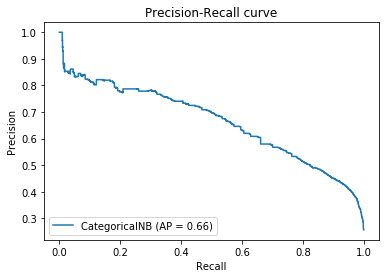

In [207]:
%matplotlib inline

from sklearn.metrics import plot_precision_recall_curve

disp = plot_precision_recall_curve(gnb, X_test, y_test)
disp.ax_.set_title('Precision-Recall curve')

#### F1 

$$ F1 = \frac{2∗(Precision ∗ Recall)}{Precision + Recall}$$

In [208]:
from sklearn.metrics import f1_score

f1_score(y_test, y_test_pred)

0.61933675852405412

#### Area under the Roc Curve (AUC)

Introduzir EXEMPLO

Text(0,0.5,'Frequency')

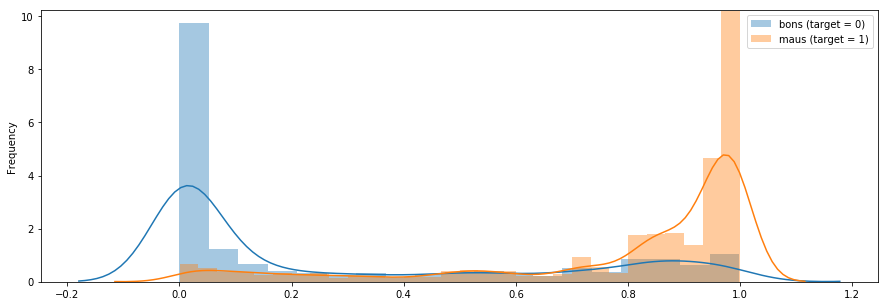

In [216]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Maus (target=1)
X_maus = data_cat_enc[(data_cat_enc['train']==0)&(data_cat_enc['target']==1)].drop('target', axis=1)
scores_maus = gnb.predict_proba(X_maus)

# Bons (target=0)
X_bons = data_cat_enc[(data_cat_enc['train']==0)&(data_cat_enc['target']==0)].drop('target', axis=1)
scores_bons = gnb.predict_proba(X_bons)

# Distribuição dos scores em cada sub-população
plt.subplots(figsize=(15,5))
sns.distplot(pd.Series(scores_bons[:,1]))
sns.distplot(pd.Series(scores_maus[:,1]))
plt.legend(['bons (target = 0)','maus (target = 1)'])
plt.ylabel('Frequency')

Text(0.5,1,'ROC curve')

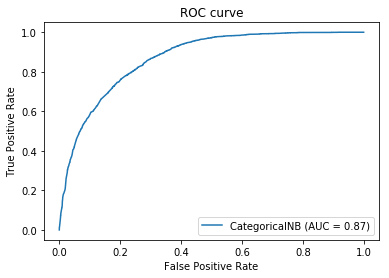

In [210]:
%matplotlib inline

from sklearn.metrics import plot_roc_curve

disp = plot_roc_curve(gnb, X_test, y_test)
disp.ax_.set_title('ROC curve')

In [211]:
from sklearn.metrics import roc_auc_score

roc_auc_score(y_test, y_test_pred)

0.78306612401461351

#### Gaussian Naive Bayes

Explicar o que é uma Gaussiana e o que muda

### Bernoulli Naive Bayes

Explicar o que é a distribuição de Bernoulli

Propor o One-Hot Encoding

#### One-Hot Encoding

In [177]:
import pandas as pd
from sklearn.model_selection import train_test_split

data = pd.read_csv('../Datasets/Adult/adult.csv',low_memory=False)
data.head()

data_train, data_test = train_test_split(data, test_size=0.4, random_state=1991)
data_train['train']=1
data_test['train']=0
data = pd.concat([data_train,data_test])

data['target'] = data['Income'].apply(lambda x: 1 if x == '>50K' else 0)
data.drop('Income',axis=1, inplace=True)

X_train = data[data['train']==1].drop('target', axis=1)
y_train = data[data['train']==1]['target']
X_test = data[data['train']==0].drop('target', axis=1)
y_test = data[data['train']==0]['target']

/Users/Francisco_de_Faria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
/Users/Francisco_de_Faria/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [178]:
categorical_variables = ['workclass', 'education','marital-status', 'occupation', 'relationship', 'race', 'sex','native-country']

for variable in categorical_variables:
    print(variable)
    aux = data[variable].astype(str)
    data = pd.concat([data,pd.get_dummies(aux, prefix=variable)],axis=1)
    data.drop(variable,axis=1, inplace=True)

workclass
education
marital-status
occupation
relationship
race
sex
native-country


In [184]:
data.sample(10)

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,train,target,workclass_?,workclass_Federal-gov,...,native-country_Portugal,native-country_Puerto-Rico,native-country_Scotland,native-country_South,native-country_Taiwan,native-country_Thailand,native-country_Trinadad&Tobago,native-country_United-States,native-country_Vietnam,native-country_Yugoslavia
25397,80,91901,9,0,0,25,0,0,1,0,...,0,0,0,0,0,0,0,1,0,0
26209,32,255885,13,0,0,43,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
14534,21,247075,9,0,0,25,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
11107,45,198223,13,0,1902,45,1,1,0,0,...,0,0,0,0,0,0,0,1,0,0
30746,30,229772,6,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
19687,50,180607,9,0,0,40,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
9389,31,144949,9,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
21936,18,151150,6,0,0,27,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3219,59,283005,7,0,0,40,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
27090,34,205704,14,0,0,35,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


In [182]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

gnb = BernoulliNB()
gnb.fit(X_train, y_train)
y_test_pred = gnb.predict(X_test)
y_test_scores = gnb.predict_proba(X_test)

ValueError: could not convert string to float: 'United-States'

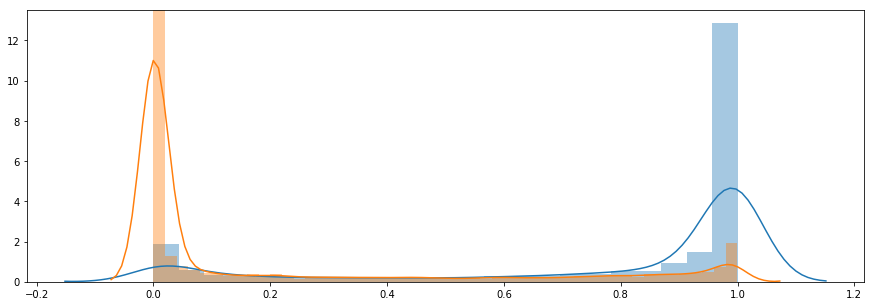

In [30]:
%matplotlib inline

import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns

# Maus (target=1)
X_maus = data[(data['train']==0)&(data['target']==1)].drop('target', axis=1)
scores_maus = gnb.predict_proba(X_maus)

# Bons (target=0)
X_bons = data[(data['train']==0)&(data['target']==0)].drop('target', axis=1)
scores_bons = gnb.predict_proba(X_bons)

# Distribuição dos scores em cada sub-população
plt.subplots(figsize=(15,5))
sns.distplot(pd.Series(scores_maus[:,1]))
sns.distplot(pd.Series(scores_bons[:,1]))